In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


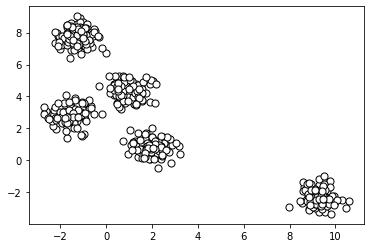

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=500, n_features=2,
   centers=5, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [3]:
from KMeans import KMeansClustering 

could not convert input data to numpy array
number of classes:  0    282
2    218
dtype: int64


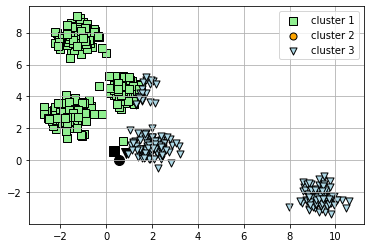

number of classes:  0    291
1    106
2    103
dtype: int64


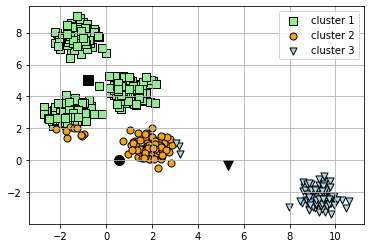

number of classes:  0    293
1    107
2    100
dtype: int64


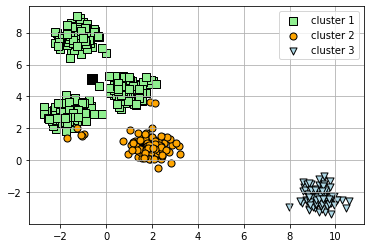

number of classes:  0    294
1    106
2    100
dtype: int64


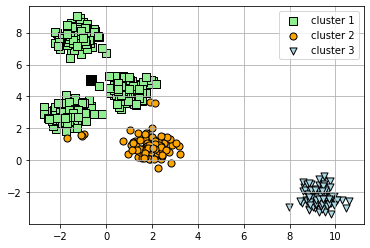

number of classes:  0    294
1    106
2    100
dtype: int64


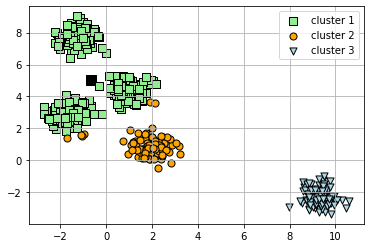

number of classes:  0    294
1    106
2    100
dtype: int64


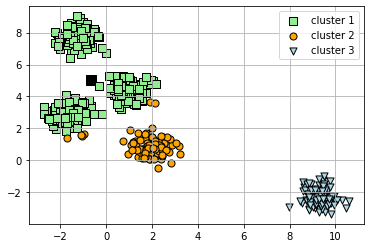

number of classes:  0    294
1    106
2    100
dtype: int64


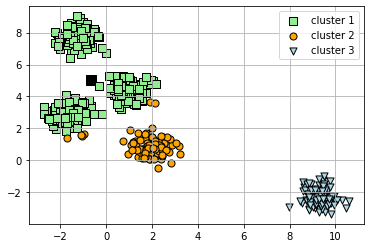

number of classes:  0    294
1    106
2    100
dtype: int64


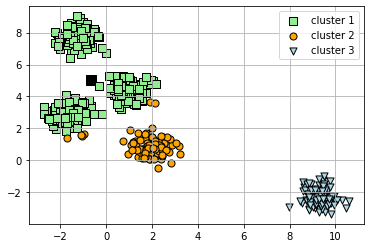

number of classes:  0    294
1    106
2    100
dtype: int64


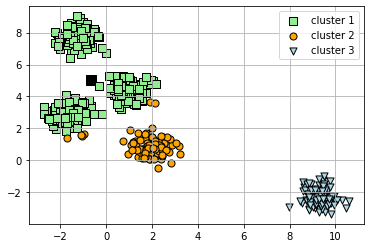

number of classes:  0    294
1    106
2    100
dtype: int64


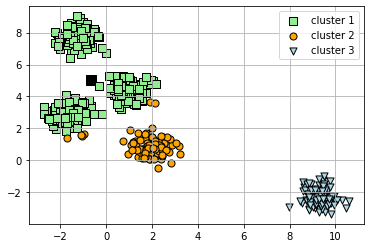

number of classes:  0    294
1    106
2    100
dtype: int64


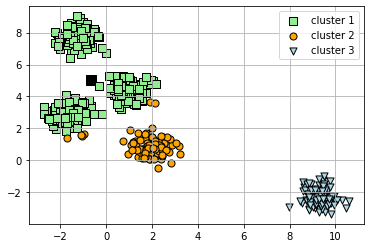

number of classes:  0    294
1    106
2    100
dtype: int64


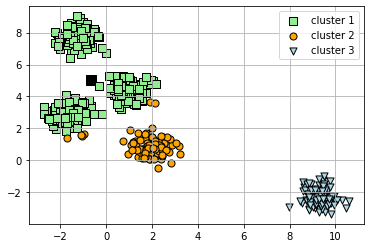

number of classes:  0    294
1    106
2    100
dtype: int64


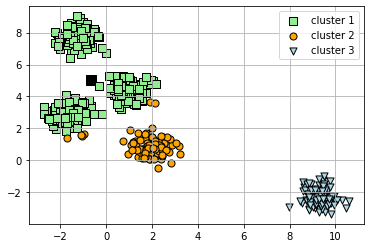

number of classes:  0    294
1    106
2    100
dtype: int64


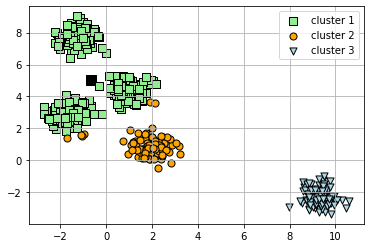

number of classes:  0    294
1    106
2    100
dtype: int64


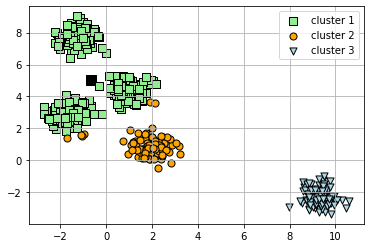

number of classes:  0    294
1    106
2    100
dtype: int64


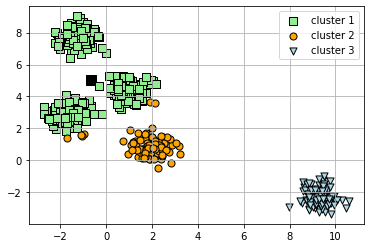

number of classes:  0    294
1    106
2    100
dtype: int64


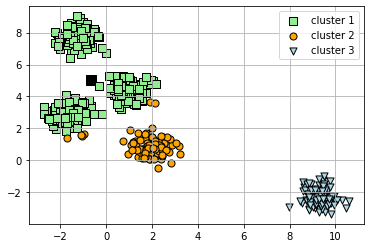

number of classes:  0    294
1    106
2    100
dtype: int64


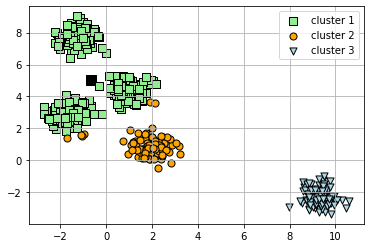

number of classes:  0    294
1    106
2    100
dtype: int64


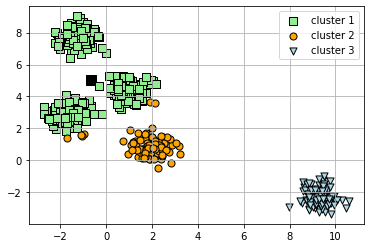

number of classes:  0    294
1    106
2    100
dtype: int64


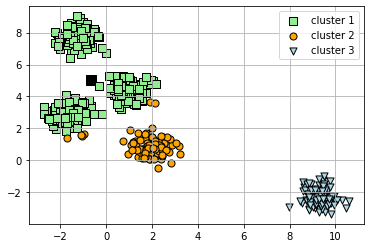

In [346]:
%matplotlib inline
class KMeansClustering:
    def __init__(self, K, initializer = 'random'):
        """
        in model.fit() give the dataframe object directly
        K (int)
        intializer = 'random' or 'KMeans++'
        """
        self.K = K

    def random_initializer(self, shape):
        # shape should be a numpy array of shape [471, 6]
        return 1*np.random.rand(self.K,shape[1])
        # returning K random centroids

    def fit(self, X, max_iter = 20):
        """
        for our purpose X consists of only the mobility points.
        """
        try: 
            X = X.to_numpy()
        except Exception as e:
            print("could not convert input data to numpy array")
        
        
        
        centroids = self.random_initializer(X.shape)
        class_index = None
        log_centroids = np.zeros(shape = [self.K, max_iter, X.shape[1]])
        num_samples = X.shape[0]
        features = X.shape[1]
        for iter in range(max_iter):
            plt.scatter(centroids[0,0], centroids[0,1], marker = 's', edgecolor = 'black', s = 100, c = 'black')
            plt.scatter(centroids[1,0], centroids[1,1], marker = 'o', edgecolor = 'black', s = 100, c = 'black')
            plt.scatter(centroids[2,0], centroids[2,1], marker = 'v', edgecolor = 'black', s = 100, c = 'black')
            
            distances = np.zeros(shape = [num_samples, self.K])
            for i in range(self.K):
                cen = centroids[i].reshape(1,features)
                distances[:,i] = np.sqrt(np.sum((X-cen)**2, axis=1))
            class_index = np.argmin(distances, axis = 1, keepdims=True)
            print("number of classes: ", pd.Series(class_index.flatten()).value_counts())
            
            for j in range(self.K):
                num_samples_in_class_j = np.sum(class_index==j)
                if(num_samples_in_class_j == 0):
                    continue
                      
                centroids[j] = np.sum(X*(class_index==j), axis= 0)/np.sum(class_index==j)
                log_centroids[j][iter] = centroids[j]
                
                
                
                
            predicted_classes = class_index.flatten()
            plt.scatter(
                X[predicted_classes == 0, 0], X[predicted_classes == 0, 1],
                s=50, c='lightgreen',
                marker='s', edgecolor='black',
                label='cluster 1'
            )
            plt.scatter(
                X[predicted_classes == 1, 0], X[predicted_classes == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='cluster 2'
            )

            plt.scatter(
                X[predicted_classes == 2, 0], X[predicted_classes == 2, 1],
                s=50, c='lightblue',
                marker='v', edgecolor='black',
                label='cluster 3'
            )
            plt.legend(scatterpoints=1)
            plt.grid()
            plt.show()
            plt.close()

        return class_index 

    def sum_of_squared_errors(self,data, centroids, classes):
        pass
        
    def plot_transition(self, log_centroids):
        fig, ax = plt.subplots(self.K, 1)
        for i in range(self.K):
            ax[i].plot(log_centroids[i])
            ax[i].set_title(f"K = {i + 1}")
        
        if not os.path.exists("./plots"):
            os.makedirs("./plots")
        plt.savefig(f"./plots/Transitions_in_K={self.K}.png")





model = KMeansClustering(3)
predicted_classes = model.fit(X)

In [172]:
pd.Series(predicted_classes.flatten()).value_counts()

2    167
0    167
1    166
dtype: int64

In [190]:
X[ind].flatten().shape

(2,)

In [191]:
K = 5
centroids = []
ind = np.random.randint(0,X.shape[0],1)
centroids.append(X[ind].flatten())
for i in range(K-1):
    distances = np.zeros(shape = [X.shape[0], len(centroids) ])
    for i in range(len(centroids)):
        cen = np.array(centroids[i]).reshape(1,X.shape[1])
        distances[:,i] = np.sqrt(np.sum((X-cen)**2, axis=1))
    min_dist_from_nearest_cen = np.min(distances, axis = 1)
    next_centroid = X[np.argmax(min_dist_from_nearest_cen)]
    centroids.append(next_centroid)
    print(next_centroid)
print(centroids)
np.array(centroids, dtype = float)
# len(centroids)

[10.44657873 -2.97075018]
[ 2.25479069 -0.48863272]
[-2.34322128  2.1339984 ]
[2.16784247 4.77602707]
[array([-1.71462623,  7.20392584]), array([10.44657873, -2.97075018]), array([ 2.25479069, -0.48863272]), array([-2.34322128,  2.1339984 ]), array([2.16784247, 4.77602707])]


array([[-1.71462623,  7.20392584],
       [10.44657873, -2.97075018],
       [ 2.25479069, -0.48863272],
       [-2.34322128,  2.1339984 ],
       [ 2.16784247,  4.77602707]])

### Implement error metric

In [201]:
classes = np.random.randint(0,2,471).reshape(471,1)


In [202]:
X[np.where(classes == 1)].shape

(235,)

In [215]:
centroids = np.random.rand(3,2)
point = np.array([3,4]).reshape(-1,2)
sumarray = np.sum((centroids - point)**2, axis = 1, keepdims = 1)
np.argmin(sumarray)

0

In [216]:
sumarray

array([[16.15739633],
       [19.93285259],
       [23.5346572 ]])

# Decision Tree implementation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

## Helper functions

In [5]:
df = pd.read_csv('./data/covid_data_india.csv' ).iloc[:,1:]
df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0


### Train Test Split Function

In [6]:
random.seed(0)

In [213]:
def train_test_split(df, test_size = 10, shuffle = True):
    """
    df = pandas dataframe
    test_size in percentage
    return train_df, test_df
    """
    num_samples = df.shape[0]
    num_test_samples = round(test_size * num_samples / 100)
    num_training_samples = num_samples - num_test_samples
    if shuffle:
        sampled_indexes = np.random.randint(0,num_samples, num_test_samples)
        test_df = df.loc[sampled_indexes]
        test_df = test_df.sample(frac = 1)
        train_df = df.drop(sampled_indexes)
        train_df = train_df.sample(frac = 1)
        return train_df, test_df

    else:
        train_df = df.loc[:num_training_samples]
        test_df = df.loc[num_training_samples:]
        return train_df, test_df
    
    

In [216]:
train, test = train_test_split(df)
print(train.shape, test.shape)

(425, 7) (47, 7)


In [31]:
train.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
172,-55.000,-11.000,14.000,-40.000,-51.143,-33.286,61537.0
356,-25.143,14.000,7.286,-9.857,-16.286,-15.143,11831.0
299,-28.571,7.714,9.571,-12.857,-17.571,-20.429,30254.0
138,-57.857,-3.571,14.286,-39.286,-50.429,-30.000,24850.0
297,-28.286,7.857,9.000,-14.857,-18.429,-19.857,29373.0


## Helper Functions
### Potential Splits

In [32]:
data = df.values
data.shape

(471, 7)

In [33]:
def get_potential_splits(data):
    """
    take data in form of pandas.DataFrame.values
    returns a dictionary where keys are column indexes, and values is the list of all the possible potential splits for that respective key
    """
    potential_splits = dict()
    _, num_cols = data.shape
    for col in range(num_cols - 1): 
        potential_splits[col] = list()
        values = np.unique(data[:,col])
        for i in range(len(values)-1):
            value = np.mean([values[i], values[i+1]])
            potential_splits[col].append(value)
    
    return potential_splits

In [34]:
potential_splits = get_potential_splits(data)
for key in potential_splits.keys():
    print(key, len(potential_splits[key]))

0 261
1 267
2 142
3 269
4 253
5 252


### Split Data

In [35]:
def split_data(data, split_col, split_val):
    """
    data is of form pandas.DataFrame.values
    split_col is the (proposed)optimal col and split_val is the (proposed)value for the split
    returns data_above, data_below
    """
    data_above = data[data[:,split_col] <= split_val]
    data_below = data[data[:,split_col] > split_val]
    return data_above, data_below
    

In [36]:
# let us set some random values for split wrt column 3
split_col = 3
split_val = -50
above, below = split_data(data, split_col, split_val)
print(above.shape, below.shape)

(71, 7) (400, 7)


### Entropy Calculations (Standard Deviation in case of numerical columns)

In [37]:
def calculate_entropy(data):
    """
    data is of form pandas.DataFrame.values. Also data is inclusive of target column
    returns variance and covariance based on the target column
    """
    target = data[:,-1]
    N = len(target)
    average = np.mean(target)
    std_dev = np.std(target)
    covariance = (std_dev/average)*100
    return std_dev, covariance

def calculate_overall_entropy(data_above, data_below):
    """
    input data of form pandas.DataFrame.values
    returns weighted average of entropies of the input tables
    """
    num_samples_above, num_samples_below = len(data_above), len(data_below)
    total_samples = num_samples_above + num_samples_below
    std_above, _ = calculate_entropy(data_above)
    std_below, _ = calculate_entropy(data_below)
    overall_std = (num_samples_above/total_samples)*std_above + (num_samples_below/total_samples)*std_below
    return overall_std


def determine_best_split(data, potential_splits):
    """
    for all columns and for all values of potential splits in every column evaluate 
    the best possible reduction in std_deviation
    """
    best_split_col = None
    best_split_value = None
    std_pre_split, _ = calculate_entropy(data)
    best_std = std_pre_split
    for col in potential_splits.keys():
        for value in potential_splits[col]:
            data_above, data_below = split_data(data, split_col= col, split_val = value)
            std_post_split = calculate_overall_entropy(data_above, data_below)
            if(std_post_split <= best_std):
                best_split_col = col
                best_split_value = value
                best_std = std_post_split
    print("Splitting wrt column {} and value {}; Std Dev reduced from {} to {}".format(best_split_col, best_split_value, std_pre_split, best_std))
    return best_split_col, best_split_value

In [38]:
entropy, covariance = calculate_entropy(data)
print(entropy, covariance)
print("overall Entropy: ", calculate_overall_entropy(above, below))
determine_best_split(data, potential_splits)

89327.94182789268 148.62835507780358
overall Entropy:  89048.98281879938
Splitting wrt column 2 and value 16.857; Std Dev reduced from 89327.94182789268 to 68219.6240586562


/tmp/ipykernel_13378/62782242.py:10: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


(2, 16.857)

### Pending: check_purity() and predict_target()

> There is not check purity function in case of regression. Instead we can set a limit of how many minimum number of samples should remain within the leaf nodes. This serves as a base case. Or we can set a limit at the depth of the tree. This is also considered as a base case only.

In [39]:
def average_of_target_col(data):
    """
    returns the average of the target values of samples in the dataframe
    """
    target = data[:,-1]
    if(len(target)>0):
        return np.mean(target)
    else:
        return 0

In [40]:
# probable: check purity again calculates the entropy of the target column in a given table and if it is less than 
# a certain threshhold std then the column might be deemed pure.

# 

# probable: predict target may return the mean of the values in the target column from a given table.

In [41]:
def decision_tree_regressor(df, df_type = 'pandas', min_samples = 10 ,max_depth = None, depth = 0):
    """
    df_type: (string) either "pandas" or "numpy"
    do not touch the depth parameter. It is being used as a counter within the function.
    when max_depth is an integer then pruning comes into action.
    Otherwise leaf node or not is decided by the minimum number of samples in the data passed
    """
    if df_type == 'pandas':
        global COLUMN_NAMES
        COLUMN_NAMES = df.columns
        data = df.values
    elif df_type == 'numpy':
        data = df
       
    
    # base cases
    if(min_samples < 2): 
        min_samples = 2
    # if no limit is set on max_depth then min_samples will serve as the termination criterion
    if(max_depth == None and len(data) < min_samples):
        return average_of_target_col(data)
    # when max depth is provided, then both max_depth and min_samples serve as the termination criterion
    # to help max_depth functionality perform better set min_samples to 2
    elif(depth == max_depth or len(data) < min_samples):
        return average_of_target_col(data)
    
    # recursive case
    else:
        depth += 1
        
        potential_splits = get_potential_splits(data)
        split_col, split_val = determine_best_split(data, potential_splits)
        data_above, data_below = split_data(data, split_col, split_val)
    
        nodeCondition = "{} <= {}".format(COLUMN_NAMES[split_col], split_val)
        left_child = decision_tree_regressor(data_below,'numpy', min_samples, max_depth, depth)
        right_child = decision_tree_regressor(data_above,'numpy', min_samples, max_depth, depth)
        
        if(left_child == right_child):
            tree = left_child
        else:
            tree = {nodeCondition: [left_child, right_child]}
        
        return tree
    

In [74]:
tree = decision_tree_regressor(train, max_depth = 15, min_samples = 2)

/tmp/ipykernel_13378/62782242.py:10: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.857; Std Dev reduced from 88401.5620668693 to 67398.01311945399
Splitting wrt column 0 and value -66.0715; Std Dev reduced from 152595.1358486302 to 38304.34028651893
Splitting wrt column 3 and value -46.7855; Std Dev reduced from 91775.1682697143 to 62720.17554045392
Splitting wrt column 5 and value -38.929; Std Dev reduced from 33098.30483653057 to 18851.368462375423
Splitting wrt column 5 and value -30.7145; Std Dev reduced from 19643.938152072486 to 10872.53359866417
Splitting wrt column 5 and value -30.0; Std Dev reduced from 9743.0 to 0.0
Splitting wrt column 5 and value -37.7145; Std Dev reduced from 11324.347038129836 to 6112.633066036273
Splitting wrt column 5 and value -32.0715; Std Dev reduced from 7640.79133254534 to 1901.1682263808218
Splitting wrt column 5 and value -36.143; Std Dev reduced from 2534.8909685077624 to 968.3333333333333
Splitting wrt column 5 and value -34.0715; Std Dev reduced from 1452.5 to 0.0
Splitting wrt column 5 an

Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 41343.847147228844 to 34837.31295694647
Splitting wrt column 4 and value -27.7145; Std Dev reduced from 41939.89395669677 to 38006.79294792579
Splitting wrt column 2 and value 12.285499999999999; Std Dev reduced from 61300.53095413027 to 33529.19917173401
Splitting wrt column 5 and value -26.5; Std Dev reduced from 31188.00553980681 to 13466.258186423724
Splitting wrt column 5 and value -24.5; Std Dev reduced from 18736.994783048856 to 8426.5
Splitting wrt column 5 and value -22.357; Std Dev reduced from 8183.5 to 0.0
Splitting wrt column 5 and value -25.7145; Std Dev reduced from 8669.5 to 0.0
Splitting wrt column 5 and value -29.2855; Std Dev reduced from 6438.609390923547 to 4136.0
Splitting wrt column 5 and value -27.714; Std Dev reduced from 6204.0 to 0.0
Splitting wrt column 1 and value 13.143; Std Dev reduced from 33715.43048336459 to 18491.358876271395
Splitting wrt column 5 and value -15.5715; Std Dev red

Splitting wrt column 0 and value -57.357; Std Dev reduced from 24513.46910286832 to 17689.021387178596
Splitting wrt column 4 and value -42.286; Std Dev reduced from 19089.433895534552 to 11633.459270053487
Splitting wrt column 5 and value -36.9285; Std Dev reduced from 9372.072252653461 to 6466.593839270112
Splitting wrt column 4 and value -39.286; Std Dev reduced from 6624.31564022792 to 5204.320560176199
Splitting wrt column 4 and value -34.9285; Std Dev reduced from 5647.023517046491 to 4767.198055413625
Splitting wrt column 4 and value -33.5; Std Dev reduced from 5265.568294983534 to 3852.037905391986
Splitting wrt column 5 and value -32.786; Std Dev reduced from 4246.980143565985 to 3562.427929144121
Splitting wrt column 0 and value -29.2145; Std Dev reduced from 4024.4890618789955 to 3383.8151257733844
Splitting wrt column 3 and value -16.9285; Std Dev reduced from 4136.177080348471 to 2628.888924024503
Splitting wrt column 2 and value 9.3575; Std Dev reduced from 2746.795985780

Splitting wrt column 3 and value -38.6425; Std Dev reduced from 871.3603827732052 to 423.97387284127217
Splitting wrt column 5 and value -30.6425; Std Dev reduced from 386.71080926190825 to 37.89953825576244
Splitting wrt column 2 and value 14.214500000000001; Std Dev reduced from 50.53271767434991 to 10.0
Splitting wrt column 5 and value -30.5; Std Dev reduced from 15.0 to 0.0
Splitting wrt column 5 and value -30.7145; Std Dev reduced from 498.5 to 0.0
Splitting wrt column 1 and value -2.9285; Std Dev reduced from 187.0 to 0.0
Splitting wrt column 4 and value -50.714; Std Dev reduced from 2591.0622060019905 to 925.2807224737144
Splitting wrt column 4 and value -50.5; Std Dev reduced from 1067.6177010313922 to 829.3931181559469
Splitting wrt column 5 and value -30.2145; Std Dev reduced from 995.2717417871363 to 597.5714517946788
Splitting wrt column 3 and value -40.2145; Std Dev reduced from 746.9643147433484 to 494.75
Splitting wrt column 5 and value -30.5; Std Dev reduced from 738.5 

In [75]:
tree

{'residential <= 16.857': [{'retail_and_recreation <= -66.0715': [{'transit_stations <= -46.7855': [{'workplaces <= -38.929': [{'workplaces <= -30.7145': [{'workplaces <= -30.0': [295158.0,
            314644.0]},
          {'workplaces <= -37.7145': [{'workplaces <= -32.0715': [332921.0,
              {'workplaces <= -36.143': [{'workplaces <= -34.0715': [346786.0,
                  349691.0]},
                352991.0]}]},
            323023.0]}]},
        {'workplaces <= -46.0': [{'workplaces <= -43.2145': [{'workplaces <= -40.0': [379308.0,
              {'workplaces <= -41.7855': [386555.0, 392488.0]}]},
            {'workplaces <= -44.929': [{'workplaces <= -43.929': [368060.0,
                357316.0]},
              {'workplaces <= -45.5715': [382146.0, 366494.0]}]}]},
          {'workplaces <= -47.357': [{'workplaces <= -46.643': [412431.0,
              414188.0]},
            401078.0]}]}]},
      {'parks <= -44.0715': [{'workplaces <= -48.0': [{'workplaces <= -45.2855': [{

### predict_sample()

In [76]:
def predict_sample(sample, tree):
    nodeCondition = list(tree.keys())[0]
    attribute, comparator, value = nodeCondition.split(" ")
    if(sample[attribute] <= float(value)):
        answer = tree[nodeCondition][1]
    else:
        answer = tree[nodeCondition][0]

    if isinstance(answer, dict):
        subtree = answer
        return predict_sample(sample, subtree)

    else: 
        return answer    


### Evaluate model performance

In [77]:
def rmse(df, tree):
    """data can be both train or test"""
    predicted = df.apply(predict_sample, axis = 1, args = (tree,))
    actual_values = df.loc[:,"new_cases"]
    rmse = np.sqrt(np.mean((predicted - actual_values)**2))
    return rmse

def r_squared(df, tree):
    predicted_values = df.apply(predict_sample, axis = 1, args = (tree,))
    actual_values = df.loc[:,"new_cases"]
    correlation_matrix = np.corrcoef(predicted_values, actual_values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    return r_squared

In [78]:
print("Training rmse: {}".format(rmse(train, tree)))
print("Test Rmse: {}".format(rmse(test, tree)))
print("Training r_squared: {}".format(r_squared(train, tree)))
print("Test r_squared: {}".format(r_squared(test, tree)))

Training rmse: 106.94809308063019
Test Rmse: 38774.29059312369
Training r_squared: 0.9999985363871546
Test r_squared: 0.8550858036357374


In [79]:
predicted_values = test.apply(predict_sample, axis = 1, args = (tree,)).sort_index()
actual_values = test.loc[:,"new_cases"].sort_index()

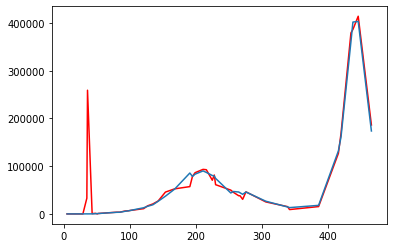

In [80]:
plt.plot(predicted_values, color = 'red')
plt.plot(actual_values)

<AxesSubplot:>

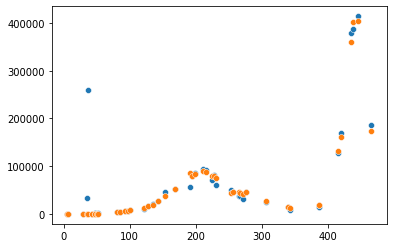

In [81]:
sns.scatterplot(y = predicted_values.values, x = predicted_values.index)
sns.scatterplot(y = actual_values.values, x = actual_values.index)

In [82]:
predicted.shape, actual_values.shape

NameError: name 'predicted' is not defined

In [83]:
correlation_matrix = np.corrcoef(predicted, actual_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

NameError: name 'predicted' is not defined

# Testing the Class Decision Tree

In [84]:
from utils import train_test_split
from decision_tree_regressor import DecisionTreeRegressor 
from KMeans import KMeansClustering as kmc

In [85]:
df.shape

(471, 7)

In [95]:
train_df, test_df = train_test_split(df)
train_df.shape, test_df.shape

((424, 7), (47, 7))

In [133]:
train_df.head(10)

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases,classes
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0,5
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0,5
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0,5
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0,5
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0,5
6,-1.143,0.714,1.000,0.429,3.429,-0.571,0.0,5
7,-1.143,0.571,1.000,0.429,3.286,-0.571,0.0,5
8,-1.286,0.000,1.000,0.286,3.143,-0.857,0.0,5
9,-1.286,-0.286,0.714,0.571,3.143,-1.000,0.0,5
10,-1.571,-0.857,0.857,0.000,2.857,-1.000,0.0,5


In [88]:
inertia_log = []
for i in range(1,20):
    kmeans = kmc(i)
    classes, inertia = kmeans.fit(train_df)
    inertia_log.append(inertia)

Inertia for K = 1 = 24550572.081084624
Inertia for K = 2 = 12615166.013046358
Inertia for K = 3 = 7230994.48274063
Inertia for K = 4 = 6088301.928335439
Inertia for K = 5 = 4993445.217214363
Inertia for K = 6 = 3961454.5861108336
Inertia for K = 7 = 3568426.5155319693
Inertia for K = 8 = 3455422.8254031665
Inertia for K = 9 = 3351432.2895679683
Inertia for K = 10 = 3411562.700374747
Inertia for K = 11 = 3443710.420473045
Inertia for K = 12 = 3410002.8724697805
Inertia for K = 13 = 3409944.840836599
Inertia for K = 14 = 3383352.2288806
Inertia for K = 15 = 3472831.3640111927
Inertia for K = 16 = 3460958.708153961
Inertia for K = 17 = 3461406.59952265
Inertia for K = 18 = 3472811.306096457
Inertia for K = 19 = 3456752.4107186575


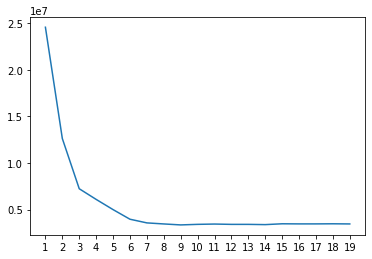

In [116]:
plt.plot(range(1,20),inertia_log)
plt.xticks(range(1,20))
plt.show()

> K = 6 seems to be the optimal number of clusters to form our random forest

In [117]:
kmeans = kmc(6)
classes, inertia= kmeans.fit(train_df)

Inertia for K = 6 = 3758282.337809821


In [118]:
np.unique(classes, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([ 18,  23,  55,  98, 116, 114]))

In [122]:
train_df['classes'] = classes
for i in range(6):
    plt.scatter(train_df.loc[np.where(classes == i), 'new_cases'])

KeyError: "None of [Index([(381, 382, 383, 384, 385, 386, 387, 389, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)], dtype='object')] are in the [index]"

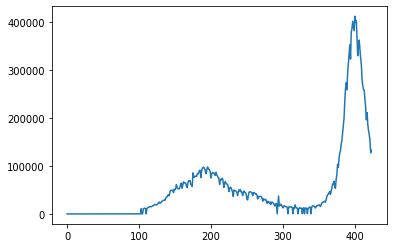

In [137]:
# train_df.loc[np.where(classes == i), 'new_cases']
plt.plot(np.where(train_df.classes == 5,train_df.index, train_df.new_cases))

In [ ]:
randomForest = list()
for i in range(K):
    filtered_data
    regressor = DecisionTreeRegressor(filtered_data, min_samples = 3)
    tree = regressor.build_tree(filtered_data)
    randomForest.append(tree)

In [112]:
train_df

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0
...,...,...,...,...,...,...,...
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429,173790.0
467,-61.286,-24.429,23.714,-48.714,-40.000,-44.571,165553.0
468,-61.143,-24.714,23.714,-49.000,-39.143,-44.286,152734.0
469,-60.143,-23.429,23.286,-48.286,-38.000,-43.429,127510.0


In [115]:
train_df['classes'] = classes
sns.scatterplot(train_df['new_cases'], hue = 'classes')

ValueError: Length of values (425) does not match length of index (424)

# Testing the decision tree class

In [101]:
from decision_tree_regressor import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(train_df, min_samples = 2, max_depth = 15)
tree = regressor.build_tree(train_df)

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.5; Std Dev reduced from 83880.38505715184 to 65762.80094735442
Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 39179.89782922038 to 32969.738265902444
Splitting wrt column 1 and value 9.285499999999999; Std Dev reduced from 7896.320776069319 to 2043.9006506480937
Splitting wrt column 4 and value -5.5; Std Dev reduced from 18.930729743357094 to 7.219161730678687
Splitting wrt column 5 and value -12.5; Std Dev reduced from 10.0 to 0.0
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.027379781070321 to 4.670345642299866
Splitting wrt column 3 and value 0.7855; Std Dev reduced from 7.524445757038673 to 4.8192555161339214
Splitting wrt column 2 and value 0.0715; Std Dev reduced from 7.321885003194191 to 5.754997827975264
Splitting wrt column 5 and value -3.2145; Std Dev reduced from 6.394442031083626 to 3.5276684147527875
Splitting wrt column 5 and value -8.4285; Std Dev reduced from 4.535573676110727 to

Splitting wrt column 3 and value -37.143; Std Dev reduced from 1427.6015278952946 to 654.5957054673705
Splitting wrt column 5 and value -29.857; Std Dev reduced from 318.0380283865437 to 133.1160208239414
Splitting wrt column 4 and value -50.857; Std Dev reduced from 177.4880277652552 to 34.0
Splitting wrt column 5 and value -30.2145; Std Dev reduced from 51.0 to 0.0
Splitting wrt column 5 and value -29.7855; Std Dev reduced from 1103.339274908473 to 235.0
Splitting wrt column 5 and value -29.9285; Std Dev reduced from 352.5 to 0.0
Splitting wrt column 4 and value -40.0715; Std Dev reduced from 40969.59216011724 to 35134.360703797094
Splitting wrt column 5 and value -27.5715; Std Dev reduced from 13837.582316549697 to 10806.31110695021
Splitting wrt column 2 and value 14.6425; Std Dev reduced from 5807.726740331295 to 4327.6917502694
Splitting wrt column 1 and value -11.9285; Std Dev reduced from 4888.175517996141 to 3945.059521804675
Splitting wrt column 5 and value -29.143; Std Dev r

Splitting wrt column 4 and value -15.0715; Std Dev reduced from 2076.1943010012824 to 1323.5214778571046
Splitting wrt column 3 and value -18.357; Std Dev reduced from 489.06727553578963 to 304.6122781504383
Splitting wrt column 5 and value -22.1425; Std Dev reduced from 380.7653476880479 to 181.58778868635412
Splitting wrt column 5 and value -18.071; Std Dev reduced from 242.1170515818055 to 96.33333333333333
Splitting wrt column 5 and value -19.571; Std Dev reduced from 144.5 to 0.0
Splitting wrt column 2 and value 9.9285; Std Dev reduced from 1787.1071458133908 to 1353.6126349599642
Splitting wrt column 4 and value -13.786; Std Dev reduced from 1634.073387805668 to 1271.1360358273375
Splitting wrt column 5 and value -19.857; Std Dev reduced from 1305.5468921107354 to 717.4134094091077
Splitting wrt column 5 and value -15.4285; Std Dev reduced from 956.5512125454769 to 620.0
Splitting wrt column 5 and value -18.714; Std Dev reduced from 1225.2548941161408 to 155.66666666666666
Splitt

Splitting wrt column 4 and value -44.0715; Std Dev reduced from 73586.63895115403 to 36380.31243114683
Splitting wrt column 3 and value -51.4285; Std Dev reduced from 40614.54207831728 to 15110.261323112478
Splitting wrt column 5 and value -49.0; Std Dev reduced from 13247.277223641091 to 7538.586912677999
Splitting wrt column 3 and value -52.2855; Std Dev reduced from 9423.233640847498 to 3224.3974049425105
Splitting wrt column 5 and value -51.143; Std Dev reduced from 4299.196539923348 to 750.6666666666666
Splitting wrt column 5 and value -50.0715; Std Dev reduced from 1126.0 to 0.0
Splitting wrt column 5 and value -49.143; Std Dev reduced from 16662.748072671966 to 10317.120718332437
Splitting wrt column 5 and value -50.2145; Std Dev reduced from 7464.0 to 0.0
Splitting wrt column 4 and value -44.7855; Std Dev reduced from 11743.681077498657 to 5828.87732543755
Splitting wrt column 5 and value -46.7145; Std Dev reduced from 7771.836433916733 to 1759.0
Splitting wrt column 5 and valu

In [102]:
regressor.rmse(test_df, tree)

14344.229897641175

In [103]:
regressor.r_squared(test_df, tree)

0.987621546561959

In [104]:
regressor.tree_depth

15

In [110]:
print(regressor.r_squared(train_df, tree))
print(regressor.r_squared(test_df, tree))

0.9999963831270977
0.987621546561959


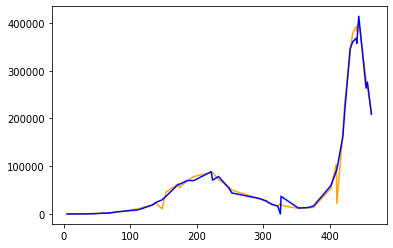

In [109]:
predicted = test_df.apply(regressor.predict_sample, axis = 1, args = (tree,)).sort_index()
actual = test_df.loc[:,"new_cases"].sort_index()
plt.plot(predicted, color = "orange")
plt.plot(actual, color = "blue")

In [ ]:
grid_search = {"max_depth": [], "min_samples": [], "r_squared_train": [], "r_squared_val": []}
for max_depth in range(1, 7):
    for min_samples in range(5, 20, 5):
        tree = decision_tree_algorithm(train_df, ml_task="regression", max_depth=max_depth, min_samples=min_samples)
        
        r_squared_train = calculate_r_squared(train_df, tree)
        r_squared_val = calculate_r_squared(val_df, tree)
        
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        
    print(f"Progress: Iteration {max_depth}/6")
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending=False).head()

In [144]:
grid_search = {"max_depth": [], "min_samples": [], "r_squared_train": [], "r_squared_val": []}
# grid_search = {"max_depth":[], "min_samples":[]}
for max_depth in range(15,20):
    for min_samples in range(3,6):
        regressor = DecisionTreeRegressor(train_df, min_samples = min_samples, max_depth = max_depth)
        tree = regressor.build_tree(train_df)
        
        r_squared_train = regressor.r_squared(train_df, tree)
        r_squared_val = regressor.r_squared(test_df, tree)
        
        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        
    print(f"Progress: Iteration {max_depth}/6")
        
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values("r_squared_val", ascending=False).head()

Splitting wrt column 6 and value 33978.0; Std Dev reduced from 1.370814692425025 to 0.7182170143523133
Splitting wrt column 6 and value 10765.5; Std Dev reduced from 0.49998109605095825 to 0.0
Splitting wrt column 6 and value 10625.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 10521.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 10448.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 10328.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 10134.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 9969.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 9761.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 9552.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 9390.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 9215.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 9115.5; Std Dev reduced from 0.0 to 0.0

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 139086.0; Std Dev reduced from 0.7822216180355936 to 0.21194781197266463
Splitting wrt column 6 and value 132378.0; Std Dev reduced from 0.0 to 0.0
Split

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 13908

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61337.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61254

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 67353.5; Std Dev reduced from 0.9769503195549507 to 0.3870787388217371
Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splittin

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61337

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639

/mnt/d/acer/Projects/Machine-Learning/assignment1/decision_tree_regressor.py:51: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 6 and value 66865.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 65732.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64652.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64562.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64476.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 64214.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63769.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63440.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 63042.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62626.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62398.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62235.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 62041.5; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 6 and value 61639

,max_depth,min_samples,r_squared_train,r_squared_val
0,15,3,0.658137,0.677532
1,15,4,0.658137,0.677532
2,15,5,0.658137,0.677532
3,16,3,0.658137,0.677532
4,16,4,0.658137,0.677532


In [143]:
grid_search

,max_depth,min_samples
0,15,3
1,15,4
2,15,5
3,16,3
4,16,4
5,16,5
6,17,3
7,17,4
8,17,5
9,18,3


In [313]:
class DecisionTreeRegressor:
    def __init__(self, df, min_samples = 2, max_depth = None, algo = 'id3'):
        self.df = df 
        self.max_depth = max_depth 
        self.min_samples = min_samples
        self.tree_depth = 0 
        self.tree_structure = None
        self.algo = algo

    def get_potential_splits(self, data):
        """
        take data in form of pandas.DataFrame.values
        returns a dictionary where keys are column indexes, and values is the list of all the possible potential splits for that respective key
        """
        potential_splits = dict()
        _, num_cols = data.shape
        for col in range(num_cols - 1): 
            potential_splits[col] = list()
            values = np.unique(data[:,col])
            for i in range(len(values)-1):
                value = np.mean([values[i], values[i+1]])
                potential_splits[col].append(value)
        
        return potential_splits

    def split_data(self, data, split_col, split_val):
        """
        data is of form pandas.DataFrame.values
        split_col is the (proposed)optimal col and split_val is the (proposed)value for the split
        returns data_above, data_below
        """
        data_above = data[data[:,split_col] <= split_val]
        data_below = data[data[:,split_col] > split_val]
        return data_above, data_below

    def calculate_stddev(self, data):
        """
        data is of form pandas.DataFrame.values. Also data is inclusive of target column
        returns variance and covariance based on the target column
        """
        target = data[:,-1]
        N = len(target)
        average = np.mean(target)
        std_dev = np.std(target)
        covariance = (std_dev/average)*100
        return std_dev, covariance  
    
    def calculate_rss(self, data):
        """
        data is of form pandas.DataFrame.values. Also data is inclusive of target column
        should return the residual sum of squares based on target column
        """
        target = data[:,-1]
        N = len(target)
        average = np.mean(target)
        rss = np.sum((target - average)**2)
        return rss
        
    
    def calculate_overall_score(self, data_above, data_below, algo = "id3"):
        """
        input data of form pandas.DataFrame.values
        algo(str): can take on two different values: id3 and CART
        returns weighted average of entropies of the input tables
        """
        num_samples_above, num_samples_below = len(data_above), len(data_below)
        total_samples = num_samples_above + num_samples_below
        std_above, _ = self.calculate_stddev(data_above)
        std_below, _ = self.calculate_stddev(data_below)
        if algo == 'id3':
            overall_score = (num_samples_above/total_samples)*std_above + (num_samples_below/total_samples)*std_below
        elif algo=='CART':
            overall_score = self.calculate_rss(data_above) + self.calculate_rss(data_below)
        return overall_score

    def determine_best_split(self, data, potential_splits, algo = "id3"):
        """
        for all columns and for all values of potential splits in every column evaluate 
        the best possible reduction in std_deviation
        algo = id3 or CART
        """
        best_split_col = None
        best_split_value = None
        if algo == 'id3':
            std_pre_split, _ = self.calculate_stddev(data)
        elif algo == 'CART':
            std_pre_split = self.calculate_rss(data)
        best_std = std_pre_split
        for col in potential_splits.keys():
            for value in potential_splits[col]:
                data_above, data_below = self.split_data(data, split_col= col, split_val = value)
                std_post_split = self.calculate_overall_score(data_above, data_below, algo)
                if(std_post_split <= best_std):
                    best_split_col = col
                    best_split_value = value
                    best_std = std_post_split
        # print("Splitting wrt column {} and value {}; Std Dev reduced from {} to {}".format(best_split_col, best_split_value, std_pre_split, best_std))
        return best_split_col, best_split_value 

    def average_of_target_col(self, data):
        """
        returns the average of the target values of samples in the dataframe
        """
        target = data[:,-1]
        if(len(target)>0):
            return np.mean(target)
        else:
            return 0


    def build_tree(self,df,df_type = 'pandas', depth = 0):
        """
        df_type: (string) either "pandas" or "numpy"
        do not touch the depth parameter. It is being used as a counter within the function.
        when max_depth is an integer then pruning comes into action.
        Otherwise leaf node or not is decided by the minimum number of samples in the data passed
        """
        if df_type == 'pandas':
            global COLUMN_NAMES
            COLUMN_NAMES = df.columns 
            data = df.values 
        elif df_type == 'numpy':
            data = df 
        
        # base cases
        if(self.min_samples < 2):
            self.min_samples = 2
        # if no limit is set on max_depth then min_samples will serve as the termination criterion
        if(self.max_depth == None and len(data) < self.min_samples):
            print("returning a leaf of depth {}".format(depth))
            return self.average_of_target_col(data)
        # when max depth is provided, then both max_depth and min_samples serve as the termination criterion
        # to help max_depth functionality perform better set min_samples to 2
        elif(depth == self.max_depth or len(data) < self.min_samples):
            print("returning a leaf of depth {}".format(depth))
            return self.average_of_target_col(data)
        
        # recursive cases
        else:
            depth += 1
            self.tree_depth = max(self.tree_depth, depth)
            potential_splits = self.get_potential_splits(data)
            split_col, split_val = self.determine_best_split(data, potential_splits, algo = self.algo)
            data_above, data_below = self.split_data(data, split_col, split_val)

            nodeCondition = "{} <= {}".format(COLUMN_NAMES[split_col], split_val)
            left_child = self.build_tree(data_above,'numpy', depth)
            right_child = self.build_tree(data_below,'numpy', depth) 

            if(left_child == right_child):
                tree = left_child 
            else: 
                tree = {nodeCondition: [left_child, right_child]}
            
            return tree 


    def predict_sample(self, sample, tree):
        nodeCondition = list(tree.keys())[0]
        attribute, comparator, value = nodeCondition.split(" ")
        if(sample[attribute] <= float(value)):
            answer = tree[nodeCondition][0]
        else:
            answer = tree[nodeCondition][1]

        if isinstance(answer, dict):
            subtree = answer
            return self.predict_sample(sample, subtree)

        else: 
            return answer    


    def rmse(self, df, tree):
        """data can be both train or test"""
        predicted = df.apply(self.predict_sample, axis = 1, args = (tree,))
        actual_values = df.loc[:,"new_cases"]
        rmse = np.sqrt(np.mean((predicted - actual_values)**2))
        return rmse

    def r_squared(self, df, tree):
        predicted_values = df.apply(self.predict_sample, axis = 1, args = (tree,))
        actual_values = df.loc[:,"new_cases"]
        correlation_matrix = np.corrcoef(predicted_values, actual_values)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        return r_squared

In [321]:
tree_instance = DecisionTreeRegressor(train_df, min_samples = 10, max_depth = None, algo = 'CART')
tree = tree_instance.build_tree(train_df)

/tmp/ipykernel_13378/1718147183.py:45: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 11
returning a leaf of depth 12
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 12
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 13
returning a leaf of depth 12
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 10
returning a leaf of depth 10
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
retur

In [322]:
tree_instance2 = DecisionTreeRegressor(train_df, min_samples = 10, max_depth = None, algo = 'id3')
tree2 = tree_instance2.build_tree(train_df)

/tmp/ipykernel_13378/1718147183.py:45: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


returning a leaf of depth 4
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 5
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 5
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 6
returning a leaf of depth 7
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 8
returning a leaf of depth 9
returning a leaf of depth 9
returning a leaf of depth 7
returning a leaf of depth 8
returning a leaf of depth 10
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 11
returning a leaf of depth 10
returning a le

In [323]:
predicted_by_cart = test_df.apply(tree_instance.predict_sample, axis = 1, args = (tree,))
predicted_by_id3 = test_df.apply(tree_instance2.predict_sample, axis = 1, args = (tree2,))

In [324]:
tree_instance.r_squared(test_df,tree)

0.5321626586540119

In [325]:
tree_instance2.r_squared(test_df, tree2)

0.833255940835641

In [ ]:

{
    'residential <= 16.857': 
    [
        {
            'residential <= 7.785500000000001': [7704.7164179104475, 51767.80632411067]
        },
        {
            'retail_and_recreation <= -66.0715': [3225.578125, 299107.60975609755]
        }
    ]
}

In [291]:
a = np.array([1,2,3,4,5,6])
b = np.mean(a)
np.sum((a-b)**2)

17.5

In [292]:
data.shape

(471, 7)

In [293]:
target_col = data[:,-1]
mean = np.mean(target_col)
rss = np.sum((target_col - mean)**2)
rss

3758335641058.6743